
Kelompok 2
---
Analisis dan Prediksi Harga Rumah

---

Muhammad Taufiq Al-Fauzi 22.11.5338
---
Trisna Julianto          19.11.3222
---
Shandika Affandi         22.11.5355
---
Aprilla Daru Pangestu    22.11.5362
---
Rizki Cahya Ramdani      22.11.5366
---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/DATA_RUMAH.csv'
df = pd.read_csv(file_path, usecols=['LB','LT', 'KT','KM', 'GRS', 'HARGA'])

In [ ]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [ ]:
df.tail()

,HARGA,LB,LT,KT,KM,GRS
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0
1009,10500000000,420,430,7,4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1010 non-null   int64
 1   LB      1010 non-null   int64
 2   LT      1010 non-null   int64
 3   KT      1010 non-null   int64
 4   KM      1010 non-null   int64
 5   GRS     1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


In [ ]:
df['HARGA'] = df['HARGA'].fillna(0).astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HARGA   1010 non-null   float64
 1   LB      1010 non-null   int64  
 2   LT      1010 non-null   int64  
 3   KT      1010 non-null   int64  
 4   KM      1010 non-null   int64  
 5   GRS     1010 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.5 KB


In [ ]:
df.shape

(1010, 6)

In [ ]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [ ]:
df.isnull().sum()

HARGA    0
LB       0
LT       0
KT       0
KM       0
GRS      0
dtype: int64

<ipython-input-21-6a81e50f037e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['KT'], ax=axs[0], palette=palette)
<ipython-input-21-6a81e50f037e>:9: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['KT'], ax=axs[0], palette=palette)
<ipython-input-21-6a81e50f037e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KT'], ax=axs[1], palette=palette)
<ipython-input-21-6a81e50f037e>:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(x=df['KT'], ax=axs[1], palette=palette)


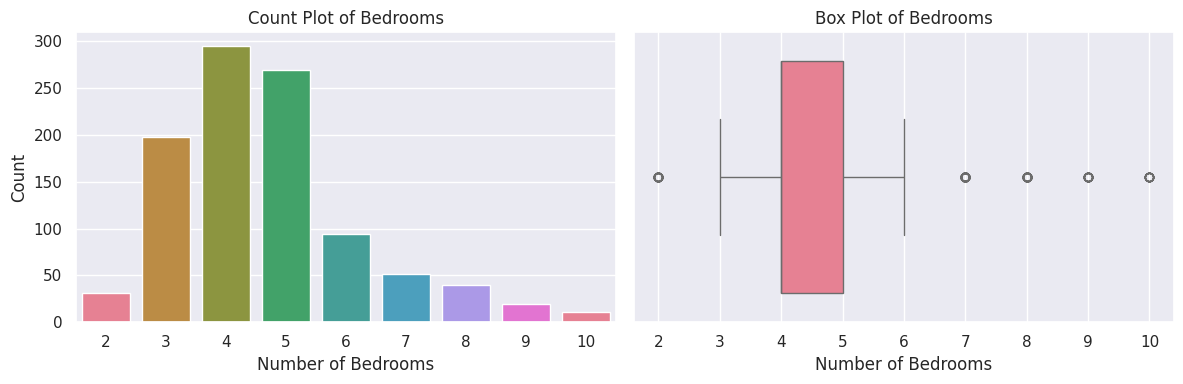

In [ ]:
sns.set(style="darkgrid")
palette = sns.color_palette("husl", 8)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=df['KT'], ax=axs[0], palette=palette)
axs[0].set_title('Count Plot of Bedrooms')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Count')

sns.boxplot(x=df['KT'], ax=axs[1], palette=palette)
axs[1].set_title('Box Plot of Bedrooms')
axs[1].set_xlabel('Number of Bedrooms')

plt.tight_layout()
plt.show()

<ipython-input-22-e54b7b6b05ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['KM'], ax=axs[0], palette=palette)
<ipython-input-22-e54b7b6b05ce>:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['KM'], ax=axs[0], palette=palette)
<ipython-input-22-e54b7b6b05ce>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['KM'], ax=axs[1], palette=palette)
<ipython-input-22-e54b7b6b05ce>:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(x=df['KM'], ax=axs[1], palette=palette)


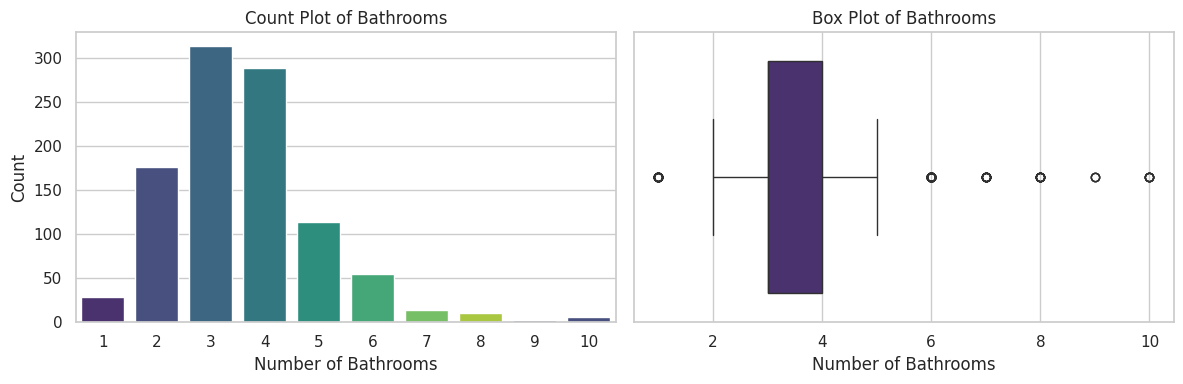

In [ ]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", 8)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=df['KM'], ax=axs[0], palette=palette)
axs[0].set_title('Count Plot of Bathrooms')
axs[0].set_xlabel('Number of Bathrooms')
axs[0].set_ylabel('Count', fontsize=12)

sns.boxplot(x=df['KM'], ax=axs[1], palette=palette)
axs[1].set_title('Box Plot of Bathrooms')
axs[1].set_xlabel('Number of Bathrooms')

plt.tight_layout()
plt.show()

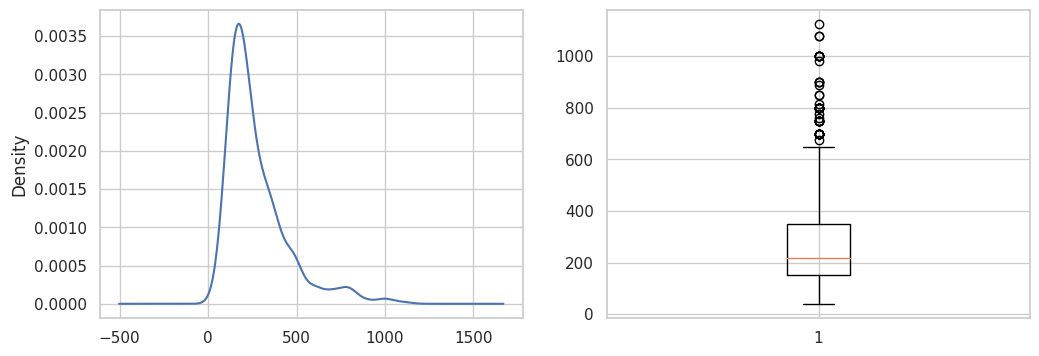

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['LB'])
plt.show()

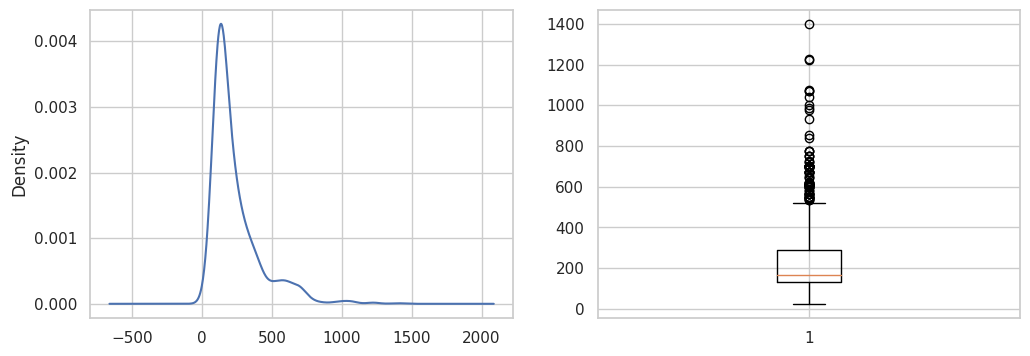

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['LT'])
plt.show()

<ipython-input-25-e8c3b41933b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['GRS'], ax=axs[0], palette=palette)
<ipython-input-25-e8c3b41933b3>:9: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['GRS'], ax=axs[0], palette=palette)
<ipython-input-25-e8c3b41933b3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['GRS'], ax=axs[1], palette=palette)
<ipython-input-25-e8c3b41933b3>:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(x=df['GRS'], ax=axs[1], palette=palette)


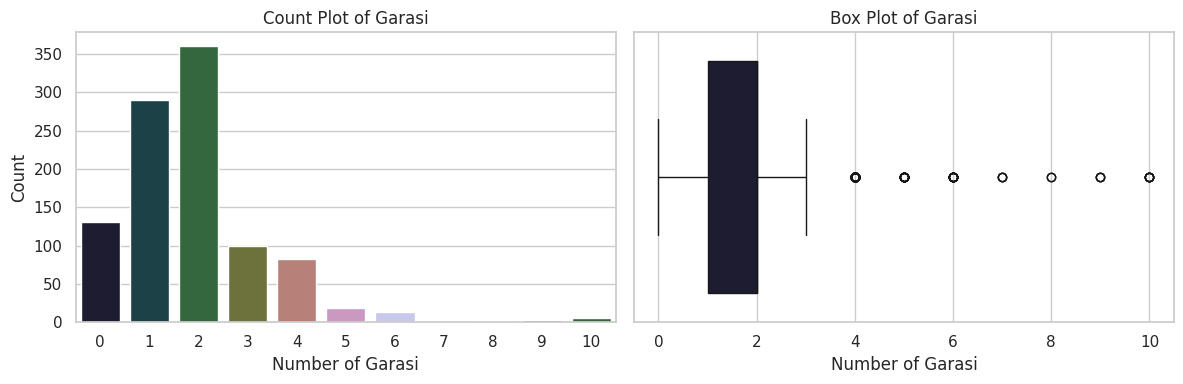

In [ ]:
sns.set(style="whitegrid")
palette = sns.color_palette("cubehelix", 8)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=df['GRS'], ax=axs[0], palette=palette)
axs[0].set_title('Count Plot of Garasi')
axs[0].set_xlabel('Number of Garasi')
axs[0].set_ylabel('Count')

sns.boxplot(x=df['GRS'], ax=axs[1], palette=palette)
axs[1].set_title('Box Plot of Garasi')
axs[1].set_xlabel('Number of Garasi')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

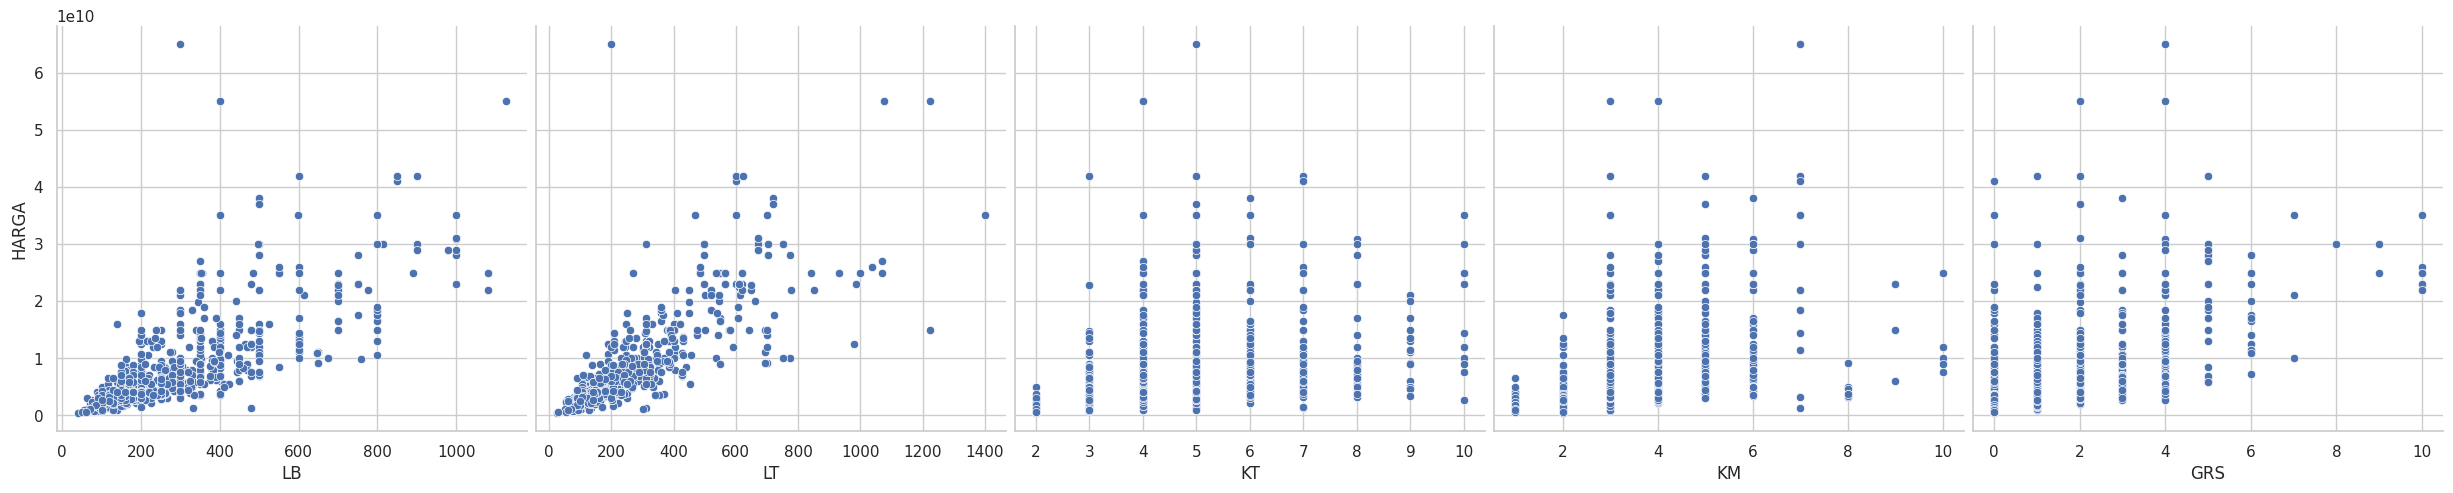

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LB', 'LT', 'KT', 'KM', 'GRS'], y_vars=['HARGA'], size=5, aspect=1)

In [ ]:
df.corr().style.background_gradient().format(precision=2)

,HARGA,LB,LT,KT,KM,GRS
HARGA,1.00,0.75,0.81,0.32,0.40,0.48
LB,0.75,1.00,0.74,0.44,0.53,0.49
LT,0.81,0.74,1.00,0.43,0.39,0.48
KT,0.32,0.44,0.43,1.00,0.67,0.28
KM,0.40,0.53,0.39,0.67,1.00,0.35
GRS,0.48,0.49,0.48,0.28,0.35,1.00


In [ ]:
correlation_matrix = df[['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']].corr()

In [ ]:
correlations = correlation_matrix['HARGA'].drop('HARGA')
print(correlations)

LB     0.747083
LT     0.809617
KT     0.323320
KM     0.404770
GRS    0.484892
Name: HARGA, dtype: float64


In [ ]:
x = df.drop(columns='HARGA')
y = df['HARGA']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Intercept:', model.intercept_)

Intercept: -694949862.5837669


In [ ]:
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

      Coefficient
LB   1.178968e+07
LT   2.361719e+07
KT  -6.548154e+08
KM   4.726420e+08
GRS  4.459360e+08


In [ ]:
y_pred = model.predict(x_test)

y_pred

array([4.01916187e+09, 5.41722712e+09, 3.26190283e+09, 6.19160866e+09,
       2.99247431e+09, 5.98561234e+08, 2.09528756e+09, 7.99433599e+09,
       4.84848865e+09, 4.77742879e+09, 2.51983234e+09, 4.23519826e+09,
       3.91109466e+09, 8.39737303e+09, 1.72247175e+10, 4.60593097e+09,
       3.34160944e+09, 3.68916430e+09, 3.56490830e+08, 2.77753499e+09,
       2.32543532e+10, 1.15229831e+10, 4.14245783e+09, 8.43826959e+09,
       2.42059999e+09, 4.18834218e+09, 1.90673110e+09, 7.63053051e+09,
       4.56981240e+09, 1.19919689e+10, 2.11304371e+10, 9.31644304e+09,
       4.13892242e+09, 3.28234377e+09, 5.67796115e+09, 2.81873419e+09,
       4.32647898e+09, 4.95009978e+09, 3.50022676e+09, 1.21840870e+10,
       8.54251572e+09, 9.35125796e+09, 8.20538454e+09, 8.67082311e+09,
       6.60205934e+09, 3.74348000e+09, 6.95279881e+09, 3.07175924e+09,
       2.28267424e+10, 3.00743464e+09, 3.61952909e+09, 4.72654053e+09,
       1.02096200e+10, 5.34195720e+09, 6.40018993e+09, 8.94592269e+09,
      

In [ ]:
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(y_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 2040890510.29
Mean Squared Error (MSE): 12455738975678101504.00


In [ ]:
r2 = r2_score(y_pred, y_test)
print("R2-score: %.2f" % r2)

R2-score: 0.70


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 3529268901.0159173


Memprediksi harga rumah menurut :

*  LT = Luas Tanah
*  LB = Luas Bangunan
*  KT = Kamar Tidur
*  KM = Kamar Mandi
*  GRS = Garasi


In [ ]:
hasil = model.predict([[150, 100, 2,2,1]])
hasil = float(hasil[0])

def format_rupiah(amount):
    return f"Rp {amount:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

hasil_rupiah = format_rupiah(hasil)
print(f"Predicted price: {hasil_rupiah}")

Predicted price: Rp 3.477.390.307,50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_best_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_best_predict.head()

,Actual,Predicted
629,8.900000e+09,9.418764e+09
788,6.500000e+09,4.391303e+09
684,6.500000e+09,7.587917e+09
516,3.700000e+10,2.220505e+10
529,1.850000e+10,1.486787e+10


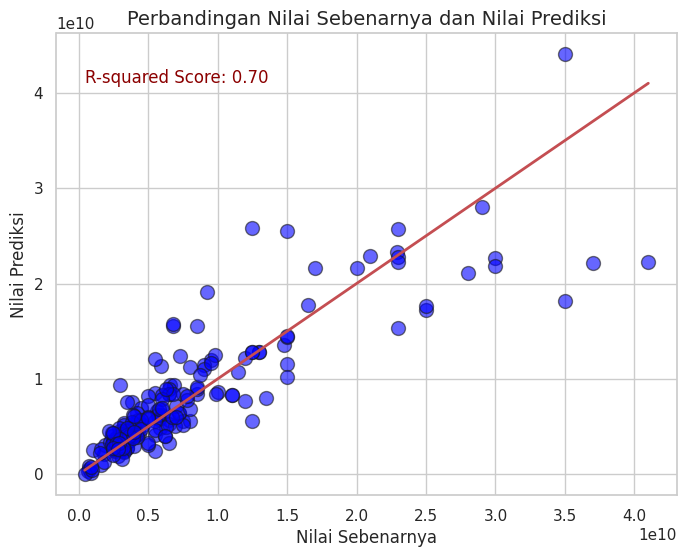

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
plt.title('Perbandingan Nilai Sebenarnya dan Nilai Prediksi', fontsize=14)
plt.xlabel('Nilai Sebenarnya', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.grid(True)
plt.text(min(y_test), max(y_test), f'R-squared Score: {r2:.2f}', fontsize=12, color='darkred', ha='left')
plt.show()